# Exploratory Data Analysis

In [5]:
! pip install numpy pandas matplotlib seaborn dask

# Import libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import dask.dataframe as dd

from zipfile import ZipFile

# Assert that Python version is 3.7 or higher
assert (sys.version_info.major == 3 and sys.version_info.minor >= 7), "This notebook requires Python 3.7 or higher."

In [6]:
# Read data into respective dataframes
companies_zip_file = ZipFile('../data/companies.csv.zip')
companies = pd.read_csv(companies_zip_file.open('companies.csv'), index_col='ticker')

entities_zip_file = ZipFile('../data/entities.csv.zip')
entities = pd.read_csv(entities_zip_file.open('entities.csv'))

tweets_zip_file = ZipFile('../data/tweets.csv.zip')
tweets = pd.read_csv(tweets_zip_file.open('tweets.csv'), index_col='id')

users_zip_file = ZipFile('../data/users.csv.zip')
users = pd.read_csv(users_zip_file.open('users.csv'), index_col='id', error_bad_lines=False)

C:\Users\amirsolei\AppData\Local\Temp\ipykernel_17800\1206268637.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv(users_zip_file.open('users.csv'), index_col='id', error_bad_lines=False)
Skipping line 369555: expected 16 fields, saw 17

Skipping line 509344: expected 16 fields, saw 17

C:\Users\amirsolei\AppData\Local\Temp\ipykernel_17800\1206268637.py:12: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(users_zip_file.open('users.csv'), index_col='id', error_bad_lines=False)


In [7]:
# Print the shape of each dataframe
print(f'companies: {companies.shape}')
print(f'entities: {entities.shape}')
print(f'tweets: {tweets.shape}')
print(f'users: {users.shape}')

companies: (30032, 3)
entities: (36482461, 3)
tweets: (9091539, 9)
users: (597411, 15)


In [8]:
companies.head()

,name,exchange,capitalization
ticker,,,
A,Agilent Technologies,NYSE,1.915000e+10
AA,Alcoa Corp,NYSE,6.480000e+09
AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [9]:
entities.head()

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [10]:
tweets.head()

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
id,,,,,,,,,
865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017
865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:01 +0000 2017
865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",Thu May 18 22:00:02 +0000 2017
865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Thu May 18 22:00:02 +0000 2017
865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:02 +0000 2017


In [11]:
users.head()

,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,verified,description,created_at,bot
id,,,,,,,,,,,,,,,
859451814940336128,Nao,sovereignao,2460,181,399,5247,6,NaN,en,Pacific Time (US & Canada),HODLing fast on,NaN,Self-sovereign,Tue May 02 16:57:35 +0000 2017,NaN
44060322,Benzinga.com,Benzinga,126228,59237,1617,2774,2310,http://www.benzinga.com/,en,Eastern Time (US & Canada),Zingernation,1.0,Financial news site. Creator of Benzinga Pro: ...,Tue Jun 02 04:43:10 +0000 2009,NaN
713570637306986496,Best Investings,bestinvestings,2718,27,0,0,3,NaN,en,Pacific Time (US & Canada),IN THE CHARTS,NaN,May or may not give you the best investing adv...,Sat Mar 26 03:37:52 +0000 2016,NaN
823239593151655936,thestocklist,thestocklist,447,25,9,3,2,http://thestocklist.com,en,Eastern Time (US & Canada),U.S.A.,NaN,Check out my new website http://thestocklist.c...,Sun Jan 22 18:43:08 +0000 2017,NaN
44367489,MM&M Magazine,MMMnews,11078,9277,548,90,783,http://www.mmm-online.com,en,Quito,"New York, NY, USA",NaN,"MM&M: the most objective, relevant, and timely...",Wed Jun 03 14:20:16 +0000 2009,NaN


In [12]:
pd.options.mode.chained_assignment = None# Search the text column for cashtags and store them in a new column
tweets['cashtags'] = tweets['text'].str.findall(r'\$\w+')

In [13]:
# Find the number of cashtags in each tweet
tweets['cashtags_count'] = tweets['cashtags'].str.len()

In [14]:
# Find the count of each cashtag
cashtags_count = tweets['cashtags'].explode().value_counts().reset_index()
cashtags_count.columns = ['cashtag', 'count']
cashtags_count.head()

cashtags_count['cashtag'] = cashtags_count['cashtag'].str.replace('$', '', regex=True)
cashtags_count['cashtag'] = cashtags_count['cashtag'].str.upper()
# Check which cashtags are in the companies dataframe
cashtags_count['in_companies'] = cashtags_count['cashtag'].isin(companies.index)
cashtags_count.head()

,cashtag,count,in_companies
0,AAPL,277799,True
1,0,237086,False
2,AMZN,236923,True
3,ETH,235669,False
4,FB,216565,True


In [15]:
# Create a new dataframe with the cashtags that are in the companies dataframe
cashtags_count_companies = cashtags_count[cashtags_count['in_companies'] == True]
cashtags_count_companies = cashtags_count_companies.drop(columns=['in_companies'])

# Combine identical cashtags
cashtags_count_companies = cashtags_count_companies.groupby('cashtag').sum().sort_values(by='count', ascending=False).reset_index()

# Replace the cashtags with the company names
cashtags_count_companies['name'] = cashtags_count_companies['cashtag'].apply(lambda x: companies.loc[x]['name'])
cashtags_count_companies.head(10)

,cashtag,count,name
0,AAPL,290321,Apple Inc.
1,AMZN,253827,"Amazon.com, Inc."
2,FB,231842,Facebook Inc
3,LTC,207854,LTC Properties Inc
4,TSLA,198757,Tesla Inc
5,SPY,165270,SPDR S&P 500 ETF Tru
6,NEO,153005,"NeoGenomics, Inc."
7,CHRO,136966,CHRON ORGANIZATION C
8,QQQ,131778,PowerShares QQQ Trus
9,NFLX,130887,"Netflix, Inc."


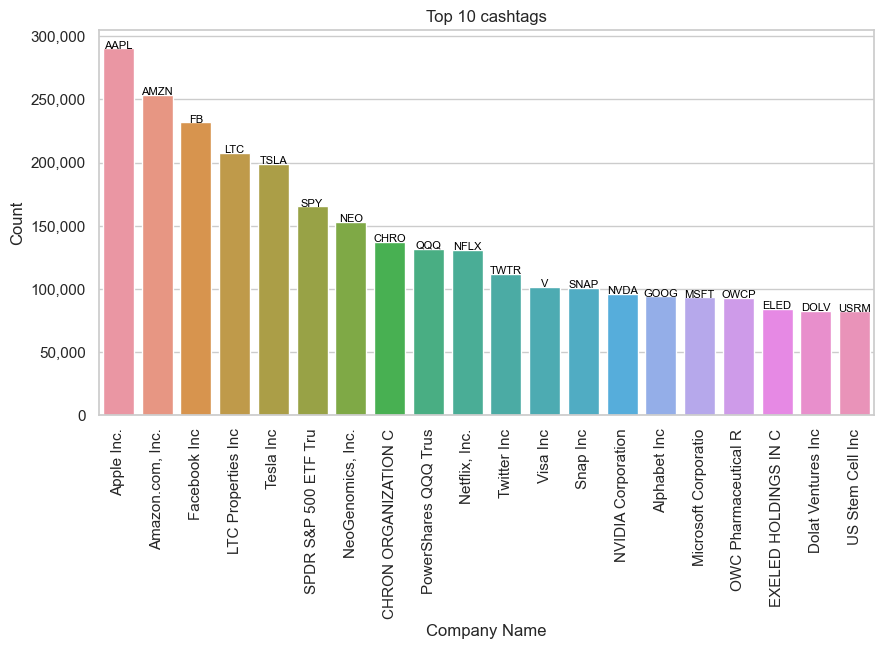

In [16]:
# Plot the top 20 cashtags
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.barplot(x='name', y='count', data=cashtags_count_companies.iloc[:20])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.title('Top 10 cashtags')
plt.xlabel('Company Name')
plt.ylabel('Count')

# Print the cashtag on each bar
for index, row in cashtags_count_companies.iloc[:20].iterrows():
    plt.text(row.name, row['count'], row['cashtag'], color='black', ha="center", fontfamily='sans-serif', fontsize=8)
plt.show()



In [17]:
# Filter dataframe with companies only from NASDAQ and NYSE
cashtags_count_nasdaq_nyse = cashtags_count_companies[cashtags_count_companies['cashtag'].isin(companies[companies['exchange'].isin(['NASDAQ', 'NYSE'])].index)]
cashtags_count_nasdaq_nyse.tail(10)

,cashtag,count,name
17282,HMH,1,Helios Multi Sector
17298,EMMT,1,iShares MSCI Emrg Mr
17354,TBOW,1,Trunkbow Internation
17393,SNS,1,Stewart & Stevenson
17396,HIH,1,Helios High Income F
17459,JACQ,1,Collabrium Japan Acq
17478,HSA,1,Helios Strategic Inc
17494,FMAX,1,Full Spectrum Inc
17540,RIBX,1,Melinta Therapeutics
17554,GAGA,1,Le Gaga Holdings Ltd


Printing the same plot for least tweeted stocks is redundant since many of companies on the least (even when we consider ones listed on the NYSE or NASDAQ) tweeted stocks have a very small number of tweets or only one tweet. Therefore, instead of plotting the least tweeted stocks, we will plot number of companies with a certain number of tweets.

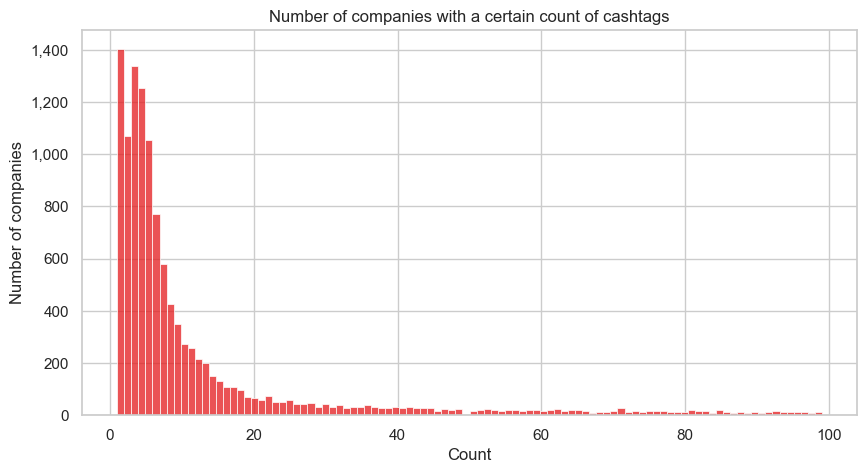

In [18]:
# Plot the number of companies with a certain count of cashtags
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")

# When plotting consider only the companies with less than 100 cashtags
sns.histplot(x='count', data=cashtags_count_companies[cashtags_count_companies['count'] < 100], bins=100)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Number of companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of companies')
plt.show()

In [19]:
# Add column of exchange to our cashtag count
cashtags_count_companies['exchange'] = cashtags_count_companies['cashtag'].apply(lambda x: companies.loc[x]['exchange'])
cashtags_count_companies.head()

,cashtag,count,name,exchange
0,AAPL,290321,Apple Inc.,NASDAQ
1,AMZN,253827,"Amazon.com, Inc.",NASDAQ
2,FB,231842,Facebook Inc,NASDAQ
3,LTC,207854,LTC Properties Inc,NYSE
4,TSLA,198757,Tesla Inc,NASDAQ


In [20]:
# Add market cap to our cashtag count
cashtags_count_companies['capitalization'] = cashtags_count_companies['cashtag'].apply(lambda x: companies.loc[x]['capitalization'])
cashtags_count_companies['capitalization'] = cashtags_count_companies['capitalization'].apply(lambda x: 0 if not isinstance(x, (int, float)) else x)

cashtags_count_companies['NASDAQ'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'NASDAQ' in x else False)
cashtags_count_companies['NYSE'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'NYSE' in x else False)
cashtags_count_companies['NYSEARC'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'NYSEARC' in x else False)
cashtags_count_companies['NYSEMKT'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'NYSEMKT' in x else False)
cashtags_count_companies['OTCMKTS'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'OTCMKTS' in x else False)

cashtags_count_companies.head()


,cashtag,count,name,exchange,capitalization,NASDAQ,NYSE,NYSEARC,NYSEMKT,OTCMKTS
0,AAPL,290321,Apple Inc.,NASDAQ,7.485500e+11,True,False,False,False,False
1,AMZN,253827,"Amazon.com, Inc.",NASDAQ,4.574300e+11,True,False,False,False,False
2,FB,231842,Facebook Inc,NASDAQ,4.413200e+11,True,False,False,False,False
3,LTC,207854,LTC Properties Inc,NYSE,1.950000e+09,False,True,False,False,False
4,TSLA,198757,Tesla Inc,NASDAQ,5.394000e+10,True,False,False,False,False


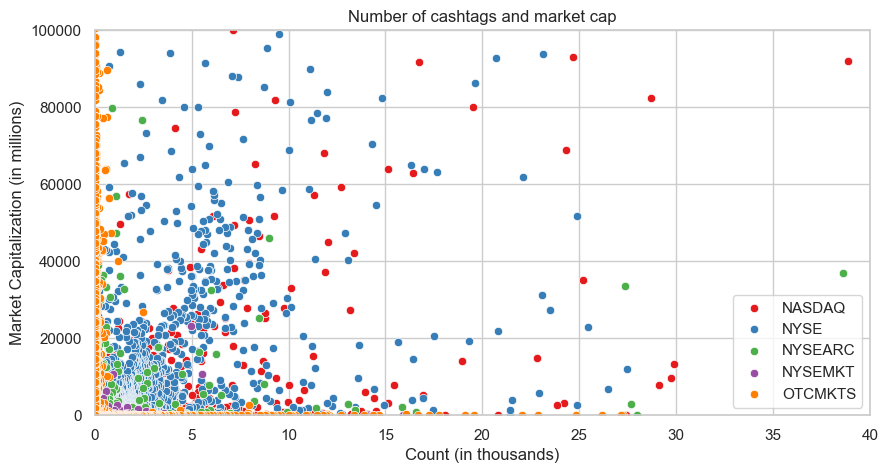

In [21]:
# Plot a scatter plot of the number of cashtags and the market cap for NASDAQ with color blue
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['NASDAQ'] == True], color='#e41a1c', label='NASDAQ')
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['NYSE'] == True], color='#377eb8', label='NYSE')
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['NYSEARC'] == True], color='#4daf4a', label='NYSEARC')
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['NYSEMKT'] == True], color='#984ea3', label='NYSEMKT')
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['OTCMKTS'] == True], color='#ff7f00', label='OTCMKTS')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: int(x/10**3)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: int(x/10**6)))
plt.title('Number of cashtags and market cap')
plt.xlabel('Count (in thousands)')
plt.ylabel('Market Capitalization (in millions)')
plt.xlim(0, 4*10**4)
plt.ylim(0, 10**11)
plt.legend()
plt.show()

In [22]:
# Change created_at to datetime
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [23]:
# Add hour column to our tweets
tweets['hour'] = tweets['created_at'].apply(lambda x: x.hour)
tweets.head()

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour
id,,,,,,,,,,,,
865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",2017-05-18 22:00:00+00:00,[$ltc],1,22
865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:01+00:00,"[$IEF, $TLT]",2,22
865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",2017-05-18 22:00:02+00:00,[$NLNK],1,22
865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2017-05-18 22:00:02+00:00,"[$VCO, $NTES, $BPT, $ENIC, $QIWI, $JP, $STX, $...",12,22
865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:02+00:00,[$GOOG],1,22


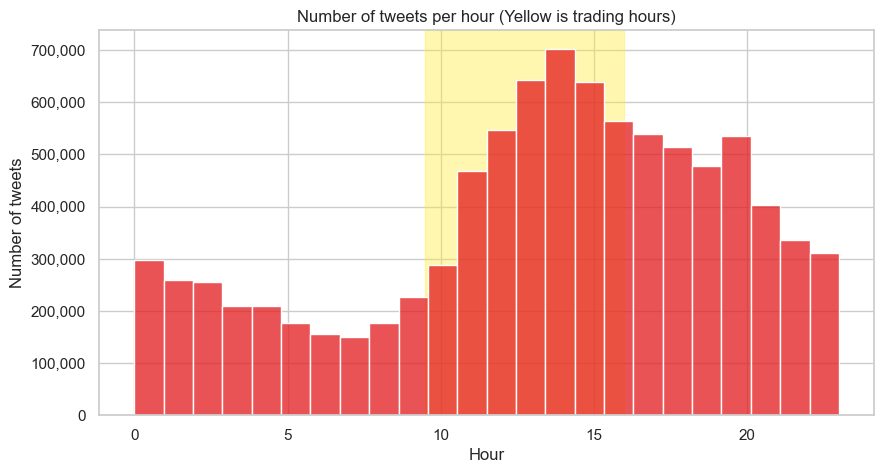

In [24]:
# Plot the number of tweets per hour
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
plt.axvspan(9.5, 16, alpha=0.4, color='#ffeb3b')
sns.histplot(x='hour', data=tweets, bins=24)
plt.title('Number of tweets per hour (Yellow is trading hours)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Hour')
plt.ylabel('Number of tweets')
plt.show()

In [25]:
# Plot the number of tweets per hour for AAPL and TSLA separately in the same plot
# plt.figure(figsize=(10, 5))
# sns.set_theme(style="whitegrid")
# sns.set_palette("Set1")
# plt.axvspan(9.5, 16, alpha=0.4, color='#ffeb3b')
# sns.histplot(x='hour', data=tweets['$AAPL'.lower() in tweets['cashtags'].apply(lambda x: (y.lower() for y in x))], bins=24, label='AAPL')
# plt.title('Number of tweets per hour for AAPL and TSLA (Yellow is trading hours)')
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.xlabel('Hour')
# plt.ylabel('Number of tweets')
# plt.legend()
# plt.show()


In [29]:
# tweets['$AAPL'.lower() in ]
test = tweets['cashtags'].apply(lambda x: (y.lower() for y in x))

In [43]:
tmp = tweets.head(100)
# tmp['$ltc'.lower() in ]
'$ltc' in tmp['cashtags'].apply(lambda x: (list(y.lower() for y in list(x))))

KeyError: 'cashtags'